<a href="https://colab.research.google.com/github/maybje/CE888/blob/master/Lab2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [19]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]



[ 2.  20.7]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	bootstrap_samples=np.random.choice(sample, size=(n_iterations,sample_size), replace=True)
	mean_array=np.mean(bootstrap_samples, axis=1)
	data_mean=np.mean(mean_array)
	lower=np.percentile(mean_array,5)
	upper=np.percentile(mean_array,95)
	return data_mean, lower, upper


(0, 100000)

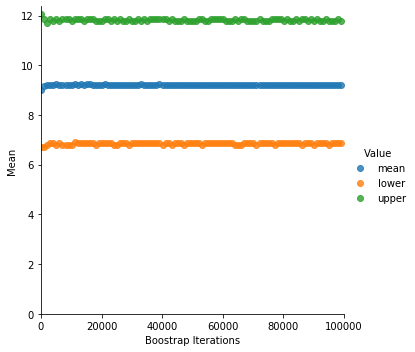

In [60]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
	bootstrap_samples=np.random.choice(sample, (iterations,sample_size), replace=True)
	mean_array=np.mean(bootstrap_samples, axis=1)
	data_mean=np.mean(mean_array)
	lower=np.percentile(mean_array,(100-ci)/2)
	upper=np.percentile(mean_array,100-((100-ci)/2))
	return data_mean, lower, upper

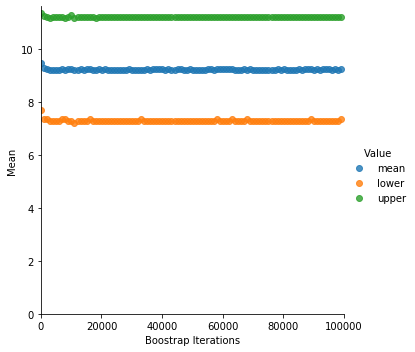

In [58]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [0]:
# Load and visualise the vehicles dataset
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data = df[df.columns[:]]

# Note: you can add more cells as needed to organise your code and your plots


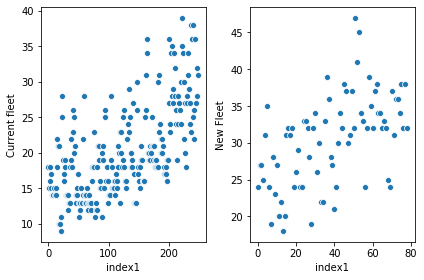

In [212]:
current=data[data.columns[0]]
new=data[data.columns[1]]
new=new[~np.isnan(new)]

df['index1'] = df.index

fig, ax =plt.subplots(1,2)
sns.scatterplot(df.columns[2], df.columns[0], data=df, ax=ax[0])
sns.scatterplot(df.columns[2], df.columns[1], data=df,  ax=ax[1])
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.show()

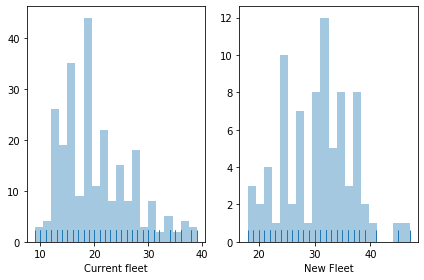

In [214]:
fig, ax =plt.subplots(1,2)
sns.distplot(current, bins=20, kde=False, rug=True,ax=ax[0])
sns.distplot(new, bins=20, kde=False, rug=True, ax=ax[1])
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.show()


In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

In [219]:
current_mean , current_lower, current_upper= boostrap_mean_ci(current, current.shape[0], 1000, 90)
print("Current mean: ", current_mean)
print("Current lower: ", current_lower)
print("Current upper: ", current_upper)


Current mean:  20.155594377510038
Current lower:  19.48995983935743
Current upper:  20.851606425702812


In [220]:
new_mean, new_lower, new_upper = boostrap_mean_ci(new, new.shape[0], 1000, 90)
print("New mean: ", new_mean)
print("New lower: ", new_lower)
print("New upper: ", new_upper)

New mean:  30.488189873417724
New lower:  29.404430379746834
New upper:  31.582278481012658


In [215]:
t_obs=new_mean-current_mean
print("Difference in Mean: ", t_obs)

Difference in Mean:  10.37809562299832


In [0]:
#defining permutation function
def permutation_test(array1, array2, n_iterations):
  results=[]
  current_mean=np.mean(array1)
  new_mean=np.mean(array2)
  t_obs=new_mean-current_mean
  concat = np.concatenate((array1, array2))
  for i in range(n_iterations):    
    perm = np.random.permutation(concat)
    pcurrent= perm[:len(array1)]
    pnew= perm[len(array1):]
    t_perm=np.mean(pnew)-np.mean(pcurrent)
    if t_perm>t_obs:
      results.append(1)
    else:
      results.append(0)
  p_value=np.sum(results)/n_iterations
  return(p_value)



Example of lecture 2

In [217]:
old = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])
new2 = np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])
permutation_test(old,new2,20000)

0.02865

Permutation Test

In [203]:
permutation_test(current,new,1000)

0.0